Task-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Sample Dateset :- https://archive.ics.uci.edu/dataset/222/bank+marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Loading the Data**

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep=';')

**Exploring the Data**

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

we can that there are 41188 entries and for each column, there are 41188 non null values...good

***Description of Data:***

**Input variables**

*Bank client data*

- age (numeric)
- job : type of job (categorical)
- marital : marital status (categorical)
- education (categorical)
- default: has credit in default? (categorical)
- housing: has housing loan? (categorical)
- loan: has personal loan? (categorical)

*Related with the last contact of the current campaign*

- contact: contact communication type (categorical)
- month: last contact month of year (categorical)
- day_of_week: last contact day of the week (categorical)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

*Other attributes*

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical)

*Social and economic context attributes*

- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

*Output variable (desired target)*

y - has the client subscribed a term deposit? (binary: 'yes','no')


In [6]:
bank.shape

(41188, 21)

Sorry but I am not the one to like "periods" in names; it's not **R** here :

In [7]:
new_column_names = bank.columns
bank.columns = new_column_names.str.replace('.','_')
bank.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

***EDA :***

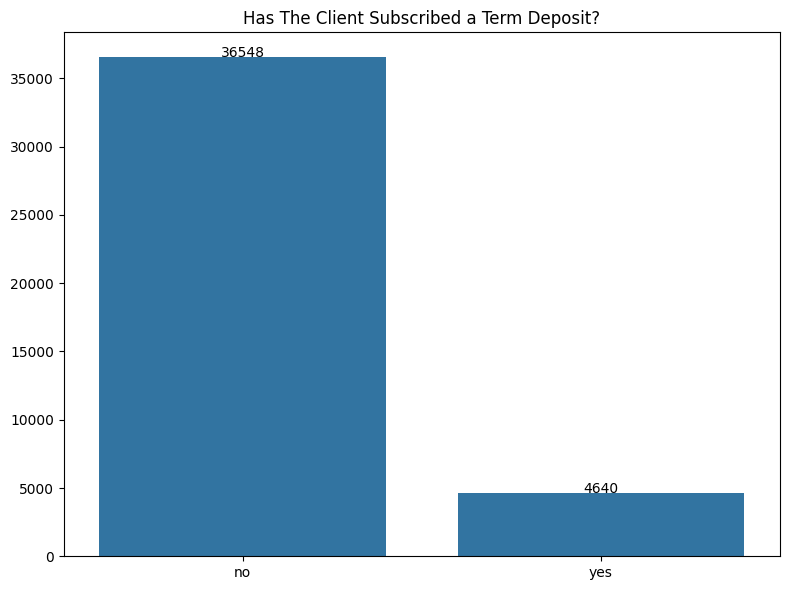

In [8]:
labels=bank['y'].value_counts().index
values=bank['y'].value_counts().values

plt.figure(figsize = (8, 6))
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")
    
plt.xlabel('')
plt.title('Has The Client Subscribed a Term Deposit?')
plt.tight_layout();
plt.show()

It's not like all of us would like to have to subscribe to a term deposit. But, anyway, it may be an inbalance case !

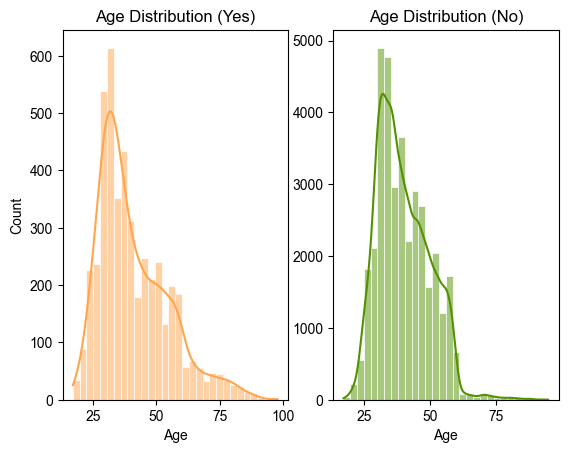

In [9]:
fig, axes = plt.subplots(1, 2)
plt.style.use('default')

sns.set(rc={"figure.figsize":(8, 4)})
 
sns.histplot(bank.loc[bank['y']=='yes']['age'], bins=30, kde = True,color='#ffa54c' , ax=axes[0])
axes[0].set_xlabel("Age", fontsize = 10)
axes[0].set_title('Age Distribution (Yes)')

sns.histplot(bank.loc[bank['y']=='no']['age'], bins=30, kde = True, color='#539100', ax=axes[1])
axes[1].set_xlabel("Age", fontsize = 10)
axes[1].set_ylabel('')
axes[1].set_title('Age Distribution (No)')

plt.show();

very similar ! let's try it another way :

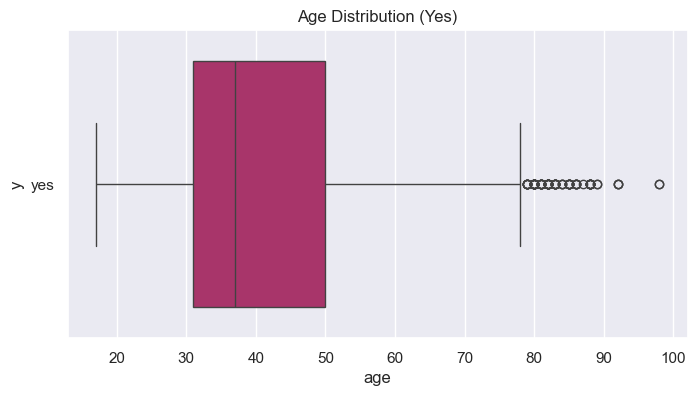

In [10]:
yes_data = bank.loc[bank['y']=='yes']

sns.set_style('darkgrid')
g = sns.boxplot(data=yes_data,y='y',x='age',orient = 'h', color = '#bb2269')
g.set_title('Age Distribution (Yes)')

plt.show(g);

The majority of clients that are subscribed a loan deposit ranges between the ages of 30 and 50, which is also prime income ages; Yeah, people have grown up and they want to make investments !

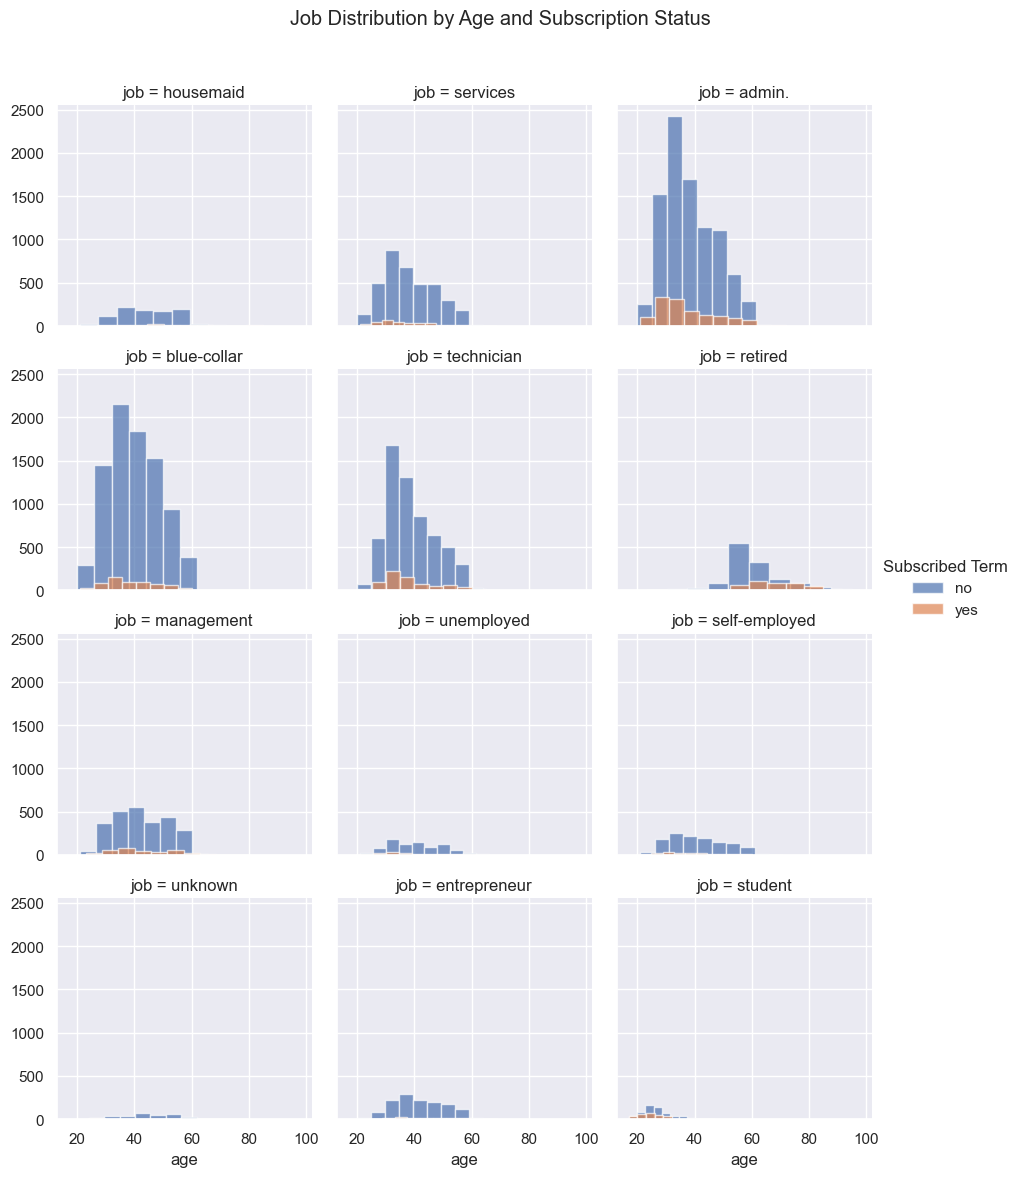

In [11]:
grid_layout = sns.FacetGrid(bank, col='job', hue='y', col_wrap=3)
grid_layout.map(plt.hist, 'age', alpha=0.7)

grid_layout.add_legend(title="Subscribed Term")

plt.subplots_adjust(top=0.9) 
grid_layout.fig.suptitle('Job Distribution by Age and Subscription Status')

plt.show()

Before we pass to education, let's make its values more clear :

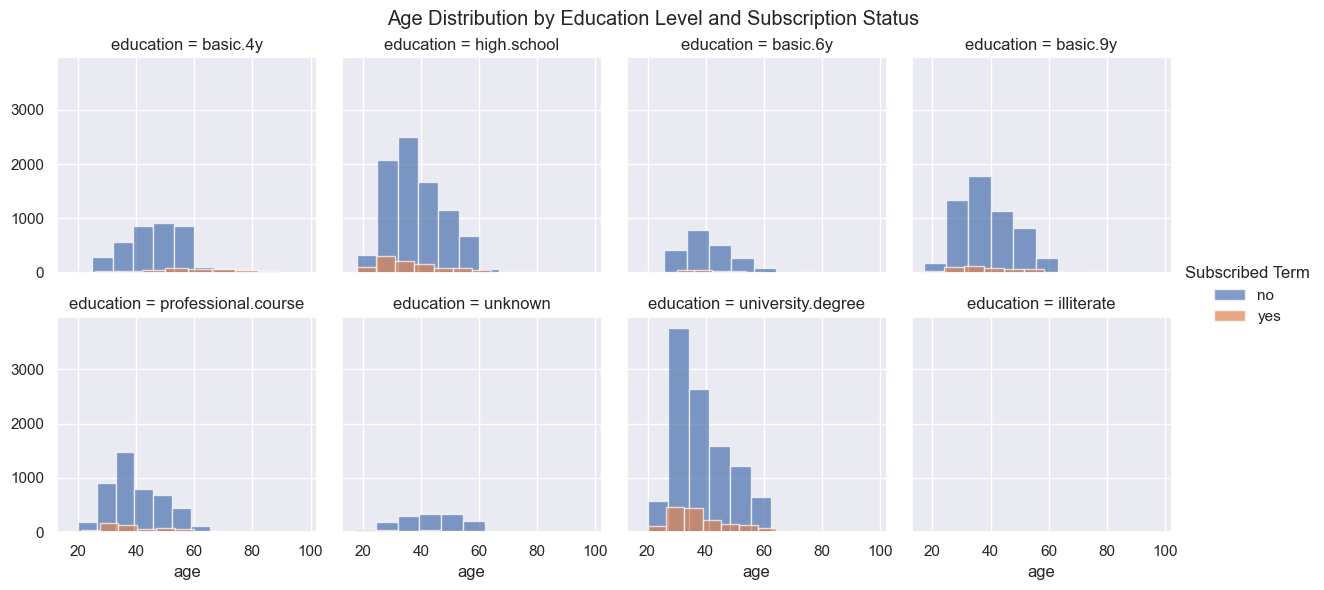

In [12]:
grid_layout = sns.FacetGrid(bank, col='education', hue='y', col_wrap=4)
grid_layout.map(plt.hist, 'age', alpha=0.7)  # `alpha=0.7` pour rendre les barres un peu transparentes

grid_layout.add_legend(title="Subscribed Term")

plt.subplots_adjust(top=0.9) 
grid_layout.fig.suptitle('Age Distribution by Education Level and Subscription Status')

plt.show()


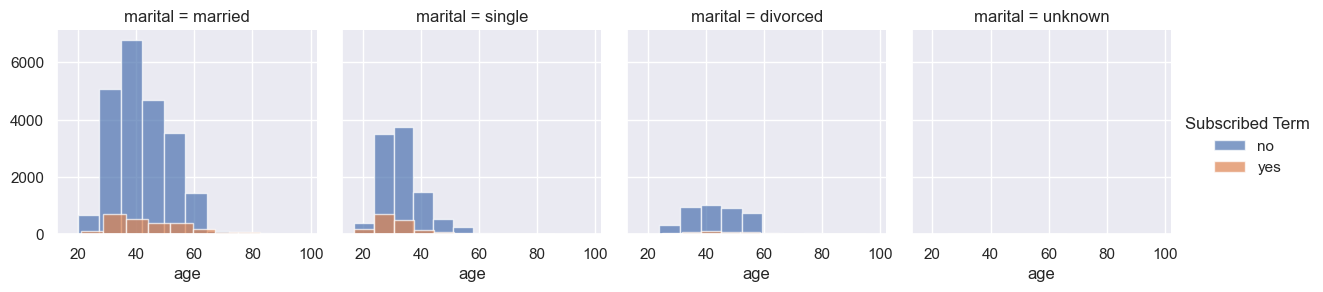

In [13]:
grid_layout = sns.FacetGrid(bank, col='marital', hue='y', col_wrap=4)
grid_layout.map(plt.hist, 'age', alpha=0.7)  # `alpha=0.7` pour une transparence des barres

grid_layout.add_legend(title="Subscribed Term")

plt.subplots_adjust(top=0.9)

plt.show()


More married couples applied and subscribed a term deposit.

C:\Users\pc\AppData\Local\Temp\ipykernel_10288\2808730791.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


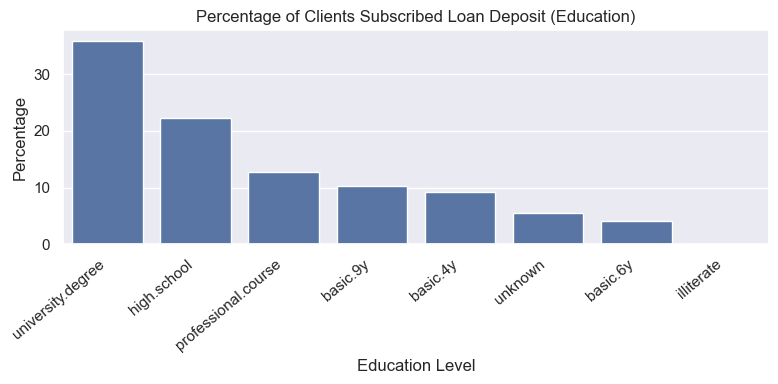

In [14]:
education_percentages = (yes_data['education'].value_counts(normalize=True).rename('percentage').mul(100)
                     .reset_index()
                     .sort_values('percentage', ascending=False))

# # Set the plot up
ax = sns.barplot(data=education_percentages,x='education',y='percentage')

# # Set up the axes
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Clients Subscribed Loan Deposit (Education)')

# # Rotate the axes labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_10288\3017492110.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


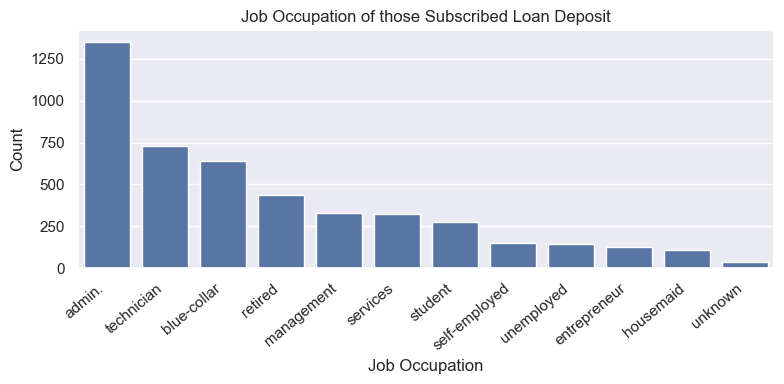

In [15]:
ax = sns.countplot(data=yes_data,x='job', order=yes_data.job.value_counts().index)

# Set up the plot axes
sns.set_style("whitegrid")
ax.set_ylabel('Count')
ax.set_xlabel('Job Occupation')
ax.set_title('Job Occupation of those Subscribed Loan Deposit')

# Rotate the x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

For job occupation, in order to be subscribed a loan deposit, the data shows that the client has to be more likely a part of the standard job occutations as compared with other occupations such as entrepreneur, housemaid. Almost proof of steady income.

***Modeling***

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = bank.select_dtypes(include=numerics).columns.tolist()

# Numerical Features
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [17]:
objects = ['object','category', 'bool']
cat_features = bank.select_dtypes(include=objects).columns.tolist()

# Remove the target varible
cat_features.remove('y')

# Categorical Features
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

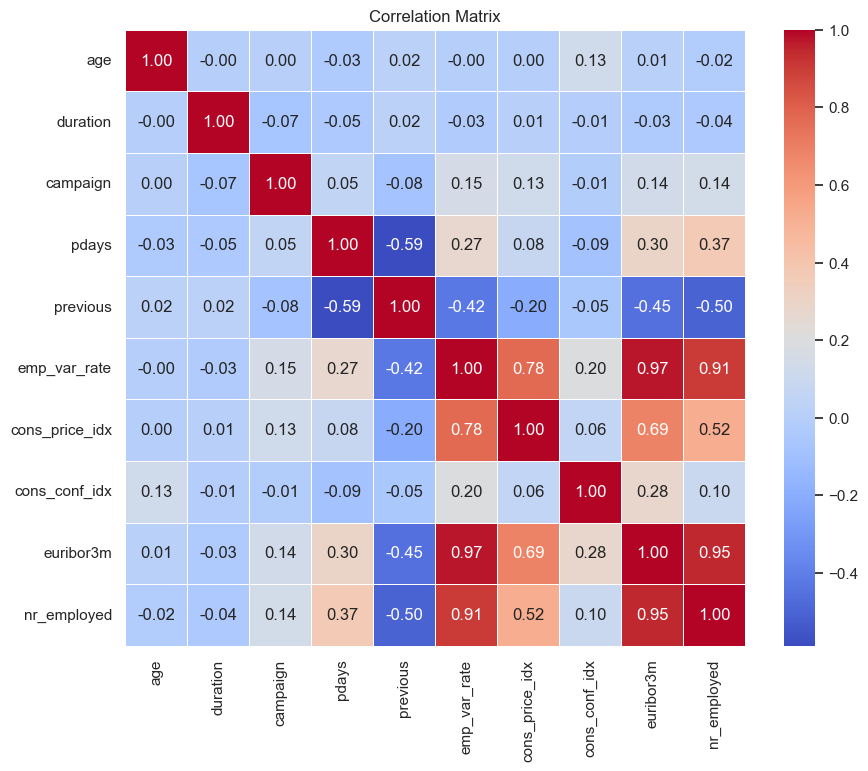

In [18]:
corr_metrics = bank[num_features].corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_metrics, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()


The correlation is high between :
- euribor3m - nr_employed: 95%
- euribor3m - emp_var_rate: 97%
- nr_employed - emp_var_rate: 91%
- emp_var_rate - cons_price_idx: 78%

This will help us for feature selection :

In [19]:
columns = np.full((corr_metrics.shape[0],), True, dtype=bool)
for i in range(corr_metrics.shape[0]):
    for j in range(i+1, corr_metrics.shape[0]):
        if corr_metrics.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
                
numerical_selected_columns = corr_metrics.columns[columns]

numerical_selected_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx'],
      dtype='object')

In [20]:
# Machine Learning Imports
#--------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# Preprocessing
#--------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine Learning Algorithms
#--------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import ExtraTreesClassifier


# Model Selection
#------------------------------------
from sklearn.model_selection import GridSearchCV

# Metrics
#-------------------------------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [21]:
# From preprocessed numerical features remove duration 
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder. 
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [22]:
# Create the cleaned up dataset
features = num_features + cat_features
X = bank[features]
y = bank["y"]

In [23]:
# Creating a preprocessing and modelling pipepline (without taking into account )
model = Pipeline(steps=[("preprocessor",preprocessor),
                        ("clf", DecisionTreeClassifier())   # ‘liblinear’ - [‘l1’, ‘l2’]
                       ])

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Train set class weights
pd.Series(y_train).value_counts(normalize=True)

y
no     0.887344
yes    0.112656
Name: proportion, dtype: float64

In [25]:
# Test set class weights
pd.Series(y_test).value_counts(normalize=True)

y
no     0.887351
yes    0.112649
Name: proportion, dtype: float64

In [26]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(conf_mat,
                     annot=True,      # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

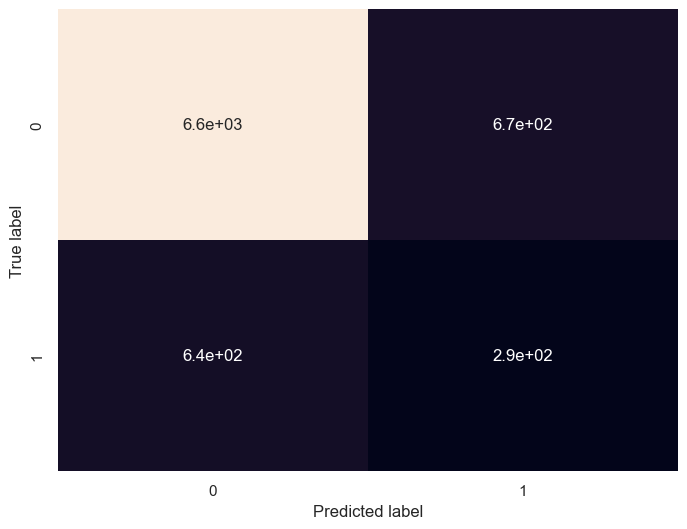

In [27]:
# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Use the model to make predictions on the test data (further evaluation)
y_preds = model.predict(X_test)

# Create a confustion matrix
conf_mat = confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat)

In [28]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.91      0.91      0.91      7310
         yes       0.30      0.31      0.31       928

    accuracy                           0.84      8238
   macro avg       0.61      0.61      0.61      8238
weighted avg       0.84      0.84      0.84      8238



In [29]:
from sklearn import metrics
y_pred = pd.Series(model.predict(X_test))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84122359796067
